In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from statsmodels.tsa.stattools import adfuller

In [34]:
df = pd.read_csv('grocery_dataset_eda.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df[(df['date'] >= '2005-01-01') & (df['date'] <= '2024-12-31')]
df = df.reset_index().set_index('date').drop(columns = 'index')
df

,US Grocery Sales,CPI (Food at Home),Real Disposable Income,Unemployment Rate,Initial Jobless Claims,Continued Jobless Claims,GDP,Personal Savings,Consumer Debt % DI,Credit Card Delinquency,...,Retail Wages_yoy_lag3,Retail Wages_yoy_lag4,Retail Wages_yoy_lag5,Retail Wages_yoy_lag6,Retail Wages_yoy_lag7,Retail Wages_yoy_lag8,Retail Wages_yoy_lag9,Retail Wages_yoy_lag10,Retail Wages_yoy_lag11,Retail Wages_yoy_lag12
date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,37628.0,188.100,11226.5,5.3,1717000.0,13619000.0,15844.727,247.1,7.303833,3.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-01,37553.0,187.700,11229.0,5.4,1247000.0,10746000.0,15844.727,210.6,7.303833,3.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-01,37645.0,188.100,11268.8,5.2,1328000.0,10638000.0,15844.727,230.2,7.303833,3.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-01,38049.0,190.000,11304.2,5.2,1616000.0,13022000.0,15922.782,195.4,7.239296,3.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,37908.0,190.200,11352.7,5.1,1308000.0,10345000.0,15922.782,243.6,7.239296,3.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,74559.0,306.239,17494.6,4.2,1155000.0,9262000.0,23400.294,904.3,5.478743,3.20,...,2.732240,2.099076,2.743774,2.524190,2.931181,3.371746,2.425532,3.178694,4.197317,3.987863
2024-09-01,75140.0,307.201,17519.6,4.1,897000.0,7325000.0,23400.294,830.7,5.478743,3.20,...,2.260360,2.732240,2.099076,2.743774,2.524190,2.931181,3.371746,2.425532,3.178694,4.197317
2024-10-01,75403.0,307.798,17584.7,4.1,948000.0,7494000.0,23536.293,881.0,5.512139,3.08,...,2.130326,2.260360,2.732240,2.099076,2.743774,2.524190,2.931181,3.371746,2.425532,3.178694


In [35]:
# Count total missing values per column
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts

GDP                         2
Consumer Debt % DI          2
Credit Card Delinquency     2
Mortgage Delinquency        2
PPI Final Food             58
                           ..
Retail Wages_yoy_lag8      34
Retail Wages_yoy_lag9      35
Retail Wages_yoy_lag10     36
Retail Wages_yoy_lag11     37
Retail Wages_yoy_lag12     38
Length: 245, dtype: int64

In [36]:
# Count infs
inf_counts = df.isin([np.inf, -np.inf]).sum()
inf_counts = inf_counts[inf_counts>0]
inf_counts

Series([], dtype: int64)

In [37]:
for col in df.columns:
    print(col)

US Grocery Sales
CPI (Food at Home)
Real Disposable Income
Unemployment Rate
Initial Jobless Claims
Continued Jobless Claims
GDP
Personal Savings
Consumer Debt % DI
Credit Card Delinquency
Mortgage Delinquency
Oil Prices
Avg Home Price
Consumer Sentiment
PPI Final Food
PPI Food and Feed
PPI Finished Consumer Goods
PPI Food Manufacture
PPI Grocery
Retail Wages
Real Disposable Income adj
US Grocery Sales_lag1
covid1
covid2
US Grocery Sales_diff
CPI (Food at Home)_diff
Real Disposable Income_diff
Unemployment Rate_diff
Initial Jobless Claims_diff
Continued Jobless Claims_diff
GDP_diff
Personal Savings_diff
Consumer Debt % DI_diff
Credit Card Delinquency_diff
Mortgage Delinquency_diff
Oil Prices_diff
Avg Home Price_diff
Consumer Sentiment_diff
PPI Final Food_diff
PPI Food and Feed_diff
PPI Finished Consumer Goods_diff
PPI Food Manufacture_diff
PPI Grocery_diff
Retail Wages_diff
Real Disposable Income adj_diff
US Grocery Sales_lag1_diff
US Grocery Sales_yoy
CPI (Food at Home)_yoy
Real Dispo

### RIDGE ###


In [38]:
# Define Features (X) and Target (y)
X = df[['US Grocery Sales_lag1', 'CPI (Food at Home)', 'Avg Home Price', 'Real Disposable Income adj', 'Credit Card Delinquency', 'covid1', 'covid2']]
y = df['US Grocery Sales'] 

# Handle missing values (fill with median)
X = X.fillna(X.median())

# Standardize features (important for Ridge Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the features

# Convert back to a DataFrame to retain column names
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

# Define training data (2004-2023) and test data (2024)
X_train = X_scaled_df.loc[:'2023-12-31']  # Features for 2004-2023
y_train = y.loc[:'2023-12-31']            # Target for 2004-2023

X_test = X_scaled_df.loc['2024-01-31':]   # Features for 2024
y_test = y.loc['2024-01-31':]             # Target for 2024

# Print train/test sizes to verify
print(f"Train Size: {X_train.shape}, Test Size: {X_test.shape}")


Train Size: (228, 7), Test Size: (11, 7)


In [39]:
# Define a range of alpha values to test
alpha_values = np.logspace(-3, 3, 100)  # Values from 0.001 to 1000

# Ridge Regression with cross-validation
ridge_cv = RidgeCV(alphas=alpha_values, store_cv_results=True)
ridge_cv.fit(X_train, y_train)

# Best alpha value selected
best_alpha = ridge_cv.alpha_
print(f"🔍 Best Alpha Found: {best_alpha}")

# Train Ridge model with best alpha
ridge = Ridge(alpha=3.7649)  # Directly using best value
ridge.fit(X_train, y_train)

ridge_train_forecast = pd.Series(ridge.predict(X_train), index=y_train.index)
ridge_test_forecast = pd.Series(ridge.predict(X_test), index=y_test.index)



🔍 Best Alpha Found: 3.2745491628777286


In [40]:
ridge_coefs = pd.DataFrame({
    "Feature": ['US Grocery Sales_lag1', 'CPI (Food at Home)', 'Avg Home Price', 'Real Disposable Income adj', 'Credit Card Delinquency', 'covid1', 'covid2'],
    "Coefficient": ridge.coef_
}).sort_values(by="Coefficient", ascending=False)

print("📌 Ridge Regression Coefficients:")
print(ridge_coefs)


📌 Ridge Regression Coefficients:
                      Feature  Coefficient
0       US Grocery Sales_lag1  3780.114864
1          CPI (Food at Home)  3131.639618
3  Real Disposable Income adj  2896.725492
2              Avg Home Price  1554.707195
6                      covid2   205.610708
5                      covid1    60.614825
4     Credit Card Delinquency  -244.173769


In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

def create_forecast_results_df(y_train, y_test, train_forecast, test_forecast):
    """
    Creates a standardized forecast DataFrame and computes performance metrics.

    Parameters:
        y_train (pd.Series): Actual sales in the training period
        y_test (pd.Series): Actual sales in the test period
        train_forecast (pd.Series): Model's forecast for the training period
        test_forecast (pd.Series): Model's forecast for the test period

    Returns:
        forecast_df (pd.DataFrame): DataFrame containing actuals, forecasts, and residuals
        metrics (dict): Dictionary containing R², MSE, MAE, and MAPE
    """

    # Compute residuals
    train_residuals = y_train - train_forecast
    test_residuals = y_test - test_forecast

    # Force missing values to NaN instead of None
    forecast_df = pd.DataFrame({
        "Actual_Sales": pd.concat([y_train, y_test]),
        "Train_Forecast": pd.concat([train_forecast.loc[y_train.index], pd.Series([np.nan] * len(y_test), index=y_test.index)]),
        "Test_Forecast": pd.concat([pd.Series([np.nan] * len(y_train), index=y_train.index), test_forecast]),
        "Train_Residuals": pd.concat([train_residuals, pd.Series([np.nan] * len(y_test), index=y_test.index)]),
        "Test_Residuals": pd.concat([pd.Series([np.nan] * len(y_train), index=y_train.index), test_residuals])
    }).astype(float)  # 🔹 Ensure all columns remain float

    # Compute Performance Metrics
    metrics = {
        "Train R²": r2_score(y_train, train_forecast),
        "Test R²": r2_score(y_test, test_forecast),
        "Train MSE": mean_squared_error(y_train, train_forecast),
        "Test MSE": mean_squared_error(y_test, test_forecast),
        "Train MAE": mean_absolute_error(y_train, train_forecast),
        "Test MAE": mean_absolute_error(y_test, test_forecast),
        "Train MAPE": np.mean(np.abs((y_train - train_forecast) / y_train)) * 100,
        "Test MAPE": np.mean(np.abs((y_test - test_forecast) / y_test)) * 100
    }

    return forecast_df, metrics



In [42]:
# Generate Ridge forecast DataFrame with metrics
ridge_forecast_df, ridge_metrics = create_forecast_results_df(
    y_train = y_train,
    y_test = y_test,
    train_forecast = ridge_train_forecast,
    test_forecast = ridge_test_forecast
)

# Print first few rows of the forecast results
print(ridge_forecast_df.tail(12))

# Print Ridge Regression performance metrics
print("📊 Ridge Regression Performance Metrics:")
for key, value in ridge_metrics.items():
    print(f"{key}: {value:.2f}")


            Actual_Sales  Train_Forecast  Test_Forecast  Train_Residuals  \
date                                                                       
2023-12-01       73465.0    74228.920055            NaN      -763.920055   
2024-02-01       73263.0             NaN   74504.152948              NaN   
2024-03-01       73617.0             NaN   74654.886103              NaN   
2024-04-01       74099.0             NaN   74832.758540              NaN   
2024-05-01       74024.0             NaN   75143.704663              NaN   
2024-06-01       74138.0             NaN   75206.538808              NaN   
2024-07-01       74892.0             NaN   75279.633124              NaN   
2024-08-01       74559.0             NaN   75527.138170              NaN   
2024-09-01       75140.0             NaN   75536.855540              NaN   
2024-10-01       75403.0             NaN   75894.811562              NaN   
2024-11-01       75235.0             NaN   76213.743615              NaN   
2024-12-01  

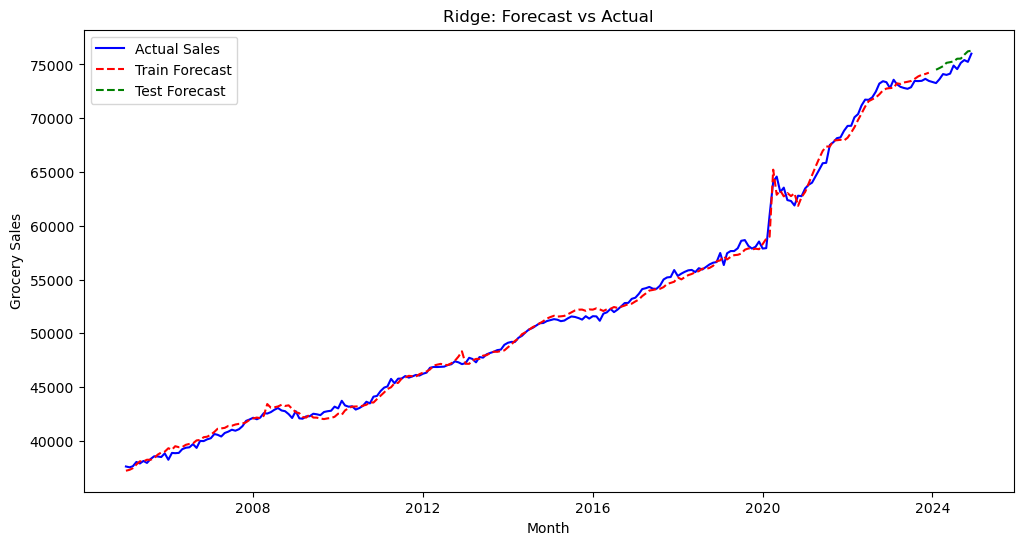

In [43]:
# Plot First-Difference Forecast vs Actual with Confidence Interval Lines
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual, train, and test forecast
ax.plot(ridge_forecast_df.index, ridge_forecast_df['Actual_Sales'], label="Actual Sales", color="blue")
ax.plot(ridge_forecast_df.index, ridge_forecast_df['Train_Forecast'], label="Train Forecast", color="red", linestyle="dashed")
ax.plot(ridge_forecast_df.index, ridge_forecast_df['Test_Forecast'], label="Test Forecast", color="green", linestyle="dashed")

# Formatting
ax.set_xlabel("Month")
ax.set_ylabel("Grocery Sales")
ax.set_title("Ridge: Forecast vs Actual")
ax.legend()

plt.show()

In [44]:
df.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', name='date', length=240, freq=None)

### OLS ###

In [45]:
from sklearn.linear_model import LinearRegression

# Define training data (2004-2023) and test data (2024)
X_train = X_scaled_df.loc[:'2023-12-31']  # Features for 2004-2023
y_train = y.loc[:'2023-12-31']            # Target for 2004-2023

X_test = X_scaled_df.loc['2024-01-31':]   # Features for 2024
y_test = y.loc['2024-01-31':]             # Target for 2024

# Train standard linear regression model
lin_reg = LinearRegression().fit(X_train, y_train)

# Predict for training period (2004-2023) and convert to Pandas Series
ols_train_forecast = pd.Series(lin_reg.predict(X_train), index=y_train.index, name="OLS_Train_Forecast")

# Predict for test period (2024) and convert to Pandas Series
ols_test_forecast = pd.Series(lin_reg.predict(X_test), index=y_test.index, name="OLS_Test_Forecast")

In [46]:
# Generate Ridge forecast DataFrame with metrics
ols_forecast_df, ols_metrics = create_forecast_results_df(
    y_train = y_train,
    y_test = y_test,
    train_forecast=ols_train_forecast,
    test_forecast=ols_test_forecast
)

# Print first few rows of the forecast results
print(ols_forecast_df.tail(12))

# Print Ridge Regression performance metrics
print("📊 OLS Regression Performance Metrics:")
for key, value in ols_metrics.items():
    print(f"{key}: {value:.2f}")

            Actual_Sales  Train_Forecast  Test_Forecast  Train_Residuals  \
date                                                                       
2023-12-01       73465.0    74246.167409            NaN      -781.167409   
2024-02-01       73263.0             NaN   74380.940223              NaN   
2024-03-01       73617.0             NaN   74485.619277              NaN   
2024-04-01       74099.0             NaN   74702.555223              NaN   
2024-05-01       74024.0             NaN   75053.862865              NaN   
2024-06-01       74138.0             NaN   75082.683009              NaN   
2024-07-01       74892.0             NaN   75163.516989              NaN   
2024-08-01       74559.0             NaN   75532.310042              NaN   
2024-09-01       75140.0             NaN   75462.750532              NaN   
2024-10-01       75403.0             NaN   75874.601604              NaN   
2024-11-01       75235.0             NaN   76168.135753              NaN   
2024-12-01  

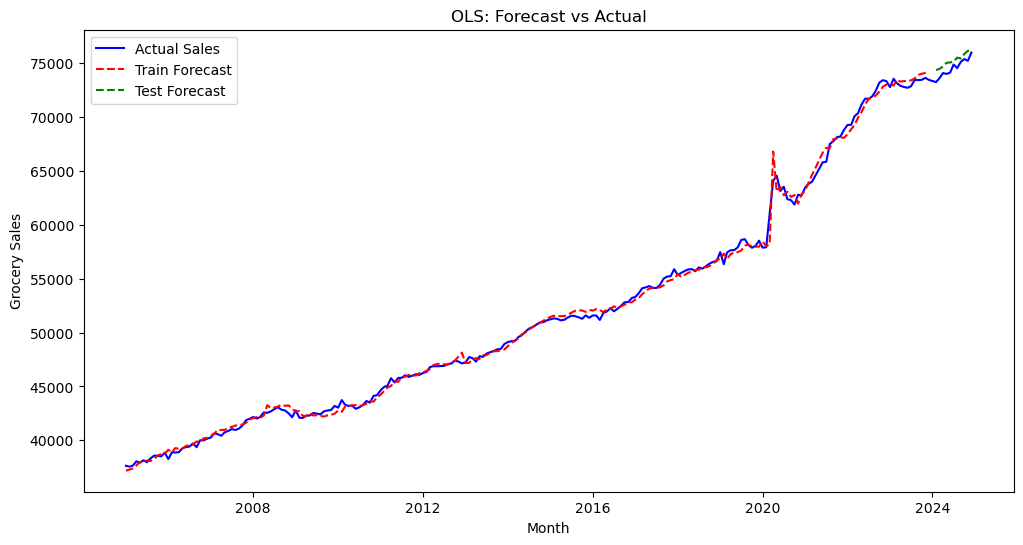

In [47]:
# Plot First-Difference Forecast vs Actual with Confidence Interval Lines
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual, train, and test forecast
ax.plot(ols_forecast_df.index, ols_forecast_df['Actual_Sales'], label="Actual Sales", color="blue")
ax.plot(ols_forecast_df.index, ols_forecast_df['Train_Forecast'], label="Train Forecast", color="red", linestyle="dashed")
ax.plot(ols_forecast_df.index, ols_forecast_df['Test_Forecast'], label="Test Forecast", color="green", linestyle="dashed")

# Formatting
ax.set_xlabel("Month")
ax.set_ylabel("Grocery Sales")
ax.set_title("OLS: Forecast vs Actual")
ax.legend()

plt.show()

### GRADIENT BOOST ###

In [48]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target_col = "US Grocery Sales"
from sklearn.linear_model import LinearRegression

# Define training data (2004-2023) and test data (2024)
X_train = X_scaled_df.loc[:'2023-12-31']  # Features for 2004-2023
y_train = y.loc[:'2023-12-31']            # Target for 2004-2023

X_test = X_scaled_df.loc['2024-01-31':]   # Features for 2024
y_test = y.loc['2024-01-31':]             # Target for 2024

# Train XG Boost
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.5,
    max_depth=3,
    reg_alpha = 1,
    reg_lambda = 1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict for training period (2004-2023)
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Convert NumPy arrays to pandas Series with correct index
y_train_pred_xgb = pd.Series(y_train_pred_xgb, index=y_train.index)
y_test_pred_xgb = pd.Series(y_test_pred_xgb, index=y_test.index)

xgb_forecast_df, xgb_metrics = create_forecast_results_df(
    y_train = y_train,
    y_test = y_test,
    train_forecast = y_train_pred_xgb,
    test_forecast = y_test_pred_xgb
)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

xgb_metrics = {
    "Train R²": r2_score(y_train, y_train_pred_xgb),
    "Test R²": r2_score(y_test, y_test_pred_xgb),
    "Train MSE": mean_squared_error(y_train, y_train_pred_xgb),
    "Test MSE": mean_squared_error(y_test, y_test_pred_xgb),
    "Train MAE": mean_absolute_error(y_train, y_train_pred_xgb),
    "Test MAE": mean_absolute_error(y_test, y_test_pred_xgb),
    "Train MAPE": mape(y_train, y_train_pred_xgb),
    "Test MAPE": mape(y_test, y_test_pred_xgb),
}

xgb_forecast_df

,Actual_Sales,Train_Forecast,Test_Forecast,Train_Residuals,Test_Residuals
date,,,,,
2005-01-01,37628.0,37627.449219,NaN,0.550781,NaN
2005-02-01,37553.0,37555.394531,NaN,-2.394531,NaN
2005-03-01,37645.0,37644.183594,NaN,0.816406,NaN
2005-04-01,38049.0,38049.726562,NaN,-0.726562,NaN
2005-05-01,37908.0,37908.242188,NaN,-0.242188,NaN
...,...,...,...,...,...
2024-08-01,74559.0,NaN,73514.484375,NaN,1044.515625
2024-09-01,75140.0,NaN,73514.484375,NaN,1625.515625
2024-10-01,75403.0,NaN,73491.921875,NaN,1911.078125


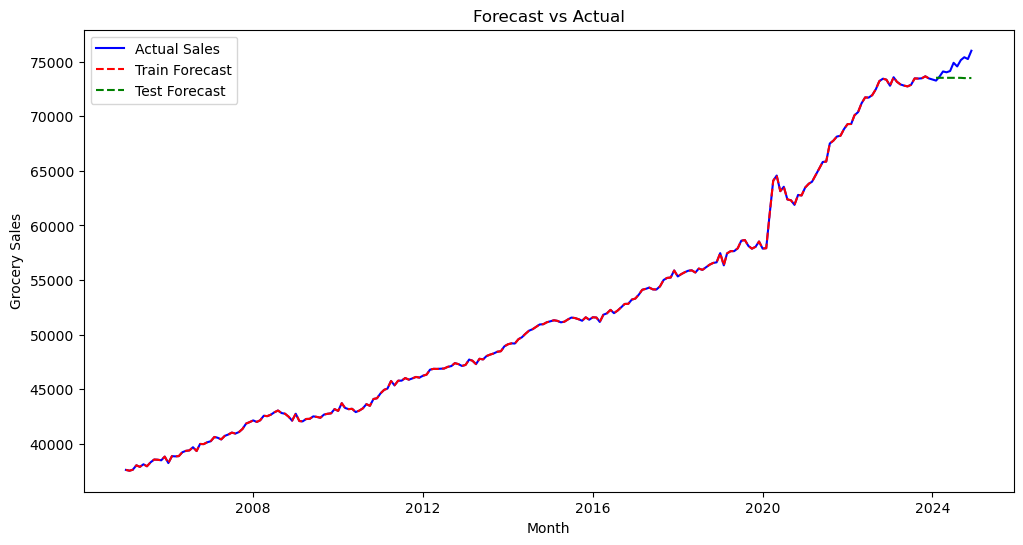

In [50]:
# Plot First-Difference Forecast vs Actual with Confidence Interval Lines
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual, train, and test forecast
ax.plot(xgb_forecast_df.index, xgb_forecast_df['Actual_Sales'], label="Actual Sales", color="blue")
ax.plot(xgb_forecast_df.index, xgb_forecast_df['Train_Forecast'], label="Train Forecast", color="red", linestyle="dashed")
ax.plot(xgb_forecast_df.index, xgb_forecast_df['Test_Forecast'], label="Test Forecast", color="green", linestyle="dashed")

# Formatting
ax.set_xlabel("Month")
ax.set_ylabel("Grocery Sales")
ax.set_title("Forecast vs Actual")
ax.legend()

plt.show()

In [51]:
# Create a dictionary of model metrics
metrics_data = {
    "Model": ["Ridge", "OLS", "XGBOOST"],
    "Train R²": [ridge_metrics["Train R²"], ols_metrics["Train R²"], xgb_metrics["Train R²"]],
    "Test R²": [ridge_metrics["Test R²"], ols_metrics["Test R²"], xgb_metrics["Test R²"]],
    "Train MSE": [ridge_metrics["Train MSE"], ols_metrics["Train MSE"], xgb_metrics["Train MSE"]],
    "Test MSE": [ridge_metrics["Test MSE"], ols_metrics["Test MSE"], xgb_metrics["Test MSE"]],
    "Train MAE": [ridge_metrics["Train MAE"], ols_metrics["Train MAE"], xgb_metrics["Train MAE"]],
    "Test MAE": [ridge_metrics["Test MAE"], ols_metrics["Test MAE"], xgb_metrics["Test MAE"]],
    "Train MAPE": [ridge_metrics["Train MAPE"], ols_metrics["Train MAPE"], xgb_metrics["Train MAPE"]],
    "Test MAPE": [ridge_metrics["Test MAPE"], ols_metrics["Test MAPE"], xgb_metrics["Test MAPE"]]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

metrics_df

,Model,Train R²,Test R²,Train MSE,Test MSE,Train MAE,Test MAE,Train MAPE,Test MAPE
0,Ridge,0.997341,-0.165243,281253.986414,7.336973e+05,408.173403,790.605796,0.782678,1.063998
1,OLS,0.997662,0.051288,247328.653460,5.973580e+05,350.884869,701.173697,0.663205,0.943689
2,XGBOOST,1.000000,-1.827491,9.589060,1.780335e+06,2.472845,1113.913352,0.004949,1.483472


In [53]:
#MERGE The three forecast dfs with the main dfs

#Rename columns
ridge_forecast_df = ridge_forecast_df.rename(columns={
    "Actual": "Actual_Sales",  # (optional, if not already this)
    "Train_Forecast": "Ridge_Train_Forecast",
    "Test_Forecast": "Ridge_Test_Forecast",
    "Train_Residuals": "Ridge_Train_Residuals",
    "Test_Residuals": "Ridge_Test_Residuals"
})

ols_forecast_df = ols_forecast_df.rename(columns={
    "Train_Forecast": "OLS_Train_Forecast",
    "Test_Forecast": "OLS_Test_Forecast",
    "Train_Residuals": "OLS_Train_Residuals",
    "Test_Residuals": "OLS_Test_Residuals"
})

xgb_forecast_df = xgb_forecast_df.rename(columns={
    "Train_Forecast": "XGB_Train_Forecast",
    "Test_Forecast": "XGB_Test_Forecast",
    "Train_Residuals": "XGB_Train_Residuals",
    "Test_Residuals": "XGB_Test_Residuals"
})

df = df.merge(ridge_forecast_df, how="left", left_index=True, right_index=True)
df = df.merge(ols_forecast_df, how="left", left_index=True, right_index=True)
df = df.merge(xgb_forecast_df, how="left", left_index=True, right_index=True)

df

,US Grocery Sales,CPI (Food at Home),Real Disposable Income,Unemployment Rate,Initial Jobless Claims,Continued Jobless Claims,GDP,Personal Savings,Consumer Debt % DI,Credit Card Delinquency,...,Actual_Sales_y,OLS_Train_Forecast,OLS_Test_Forecast,OLS_Train_Residuals,OLS_Test_Residuals,Actual_Sales,XGB_Train_Forecast,XGB_Test_Forecast,XGB_Train_Residuals,XGB_Test_Residuals
date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,37628.0,188.100,11226.5,5.3,1717000.0,13619000.0,15844.727,247.1,7.303833,3.70,...,37628.0,37173.108165,NaN,454.891835,NaN,37628.0,37627.449219,NaN,0.550781,NaN
2005-02-01,37553.0,187.700,11229.0,5.4,1247000.0,10746000.0,15844.727,210.6,7.303833,3.70,...,37553.0,37283.637374,NaN,269.362626,NaN,37553.0,37555.394531,NaN,-2.394531,NaN
2005-03-01,37645.0,188.100,11268.8,5.2,1328000.0,10638000.0,15844.727,230.2,7.303833,3.70,...,37645.0,37377.636172,NaN,267.363828,NaN,37645.0,37644.183594,NaN,0.816406,NaN
2005-04-01,38049.0,190.000,11304.2,5.2,1616000.0,13022000.0,15922.782,195.4,7.239296,3.67,...,38049.0,37663.214769,NaN,385.785231,NaN,38049.0,38049.726562,NaN,-0.726562,NaN
2005-05-01,37908.0,190.200,11352.7,5.1,1308000.0,10345000.0,15922.782,243.6,7.239296,3.67,...,37908.0,37987.272810,NaN,-79.272810,NaN,37908.0,37908.242188,NaN,-0.242188,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,74559.0,306.239,17494.6,4.2,1155000.0,9262000.0,23400.294,904.3,5.478743,3.20,...,74559.0,NaN,75532.310042,NaN,-973.310042,74559.0,NaN,73514.484375,NaN,1044.515625
2024-09-01,75140.0,307.201,17519.6,4.1,897000.0,7325000.0,23400.294,830.7,5.478743,3.20,...,75140.0,NaN,75462.750532,NaN,-322.750532,75140.0,NaN,73514.484375,NaN,1625.515625
2024-10-01,75403.0,307.798,17584.7,4.1,948000.0,7494000.0,23536.293,881.0,5.512139,3.08,...,75403.0,NaN,75874.601604,NaN,-471.601604,75403.0,NaN,73491.921875,NaN,1911.078125


In [54]:
df.to_csv('forecast_df.csv')
metrics_df.to_csv('model_performance_metrics.csv')